<a href="https://colab.research.google.com/github/nandhukumar86/mykagglesubmissions/blob/master/SanFranciscoCrimeClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Data from Kaggle

In [1]:
# # install kaggle
# ! pip install -q kaggle

# # upload file to Colab
# from google.colab import files
# files.upload()

# # create kaggle folder in root and copy the file.
# ! mkdir ~/.kaggle
# ! cp kaggle.json ~/.kaggle/

# # provide permissions
# ! chmod 600 ~/.kaggle/kaggle.json

# # download competition files by providing competition name
# ! kaggle competitions download -c 'sf-crime'

# # unzip the files and folders
# #! unzip train.csv.zip -d train
# #! unzip test.csv.zip -d test

In [2]:
# !unzip train.csv.zip

In [3]:
# !unzip test.csv.zip

# Basic imports

In [133]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
%matplotlib inline


In [225]:
df_train = pd.read_csv('train.csv')

In [226]:
df_test = pd.read_csv('test.csv')

In [227]:
df_train.columns

Index(['Dates', 'Category', 'Descript', 'DayOfWeek', 'PdDistrict',
       'Resolution', 'Address', 'X', 'Y'],
      dtype='object')

In [228]:
df_test.columns

Index(['Id', 'Dates', 'DayOfWeek', 'PdDistrict', 'Address', 'X', 'Y'], dtype='object')

In [229]:
default_features = ['Dates', 'Descript', 'DayOfWeek', 'PdDistrict', 'Address', 'X', 'Y']
target = ['Category']

In [230]:
df_train.Category.value_counts()

LARCENY/THEFT                  174900
OTHER OFFENSES                 126182
NON-CRIMINAL                    92304
ASSAULT                         76876
DRUG/NARCOTIC                   53971
VEHICLE THEFT                   53781
VANDALISM                       44725
WARRANTS                        42214
BURGLARY                        36755
SUSPICIOUS OCC                  31414
MISSING PERSON                  25989
ROBBERY                         23000
FRAUD                           16679
FORGERY/COUNTERFEITING          10609
SECONDARY CODES                  9985
WEAPON LAWS                      8555
PROSTITUTION                     7484
TRESPASS                         7326
STOLEN PROPERTY                  4540
SEX OFFENSES FORCIBLE            4388
DISORDERLY CONDUCT               4320
DRUNKENNESS                      4280
RECOVERED VEHICLE                3138
KIDNAPPING                       2341
DRIVING UNDER THE INFLUENCE      2268
RUNAWAY                          1946
LIQUOR LAWS 

In [231]:
df_train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [232]:
df_train.Descript.value_counts()

GRAND THEFT FROM LOCKED AUTO                       60022
LOST PROPERTY                                      31729
BATTERY                                            27441
STOLEN AUTOMOBILE                                  26897
DRIVERS LICENSE, SUSPENDED OR REVOKED              26839
                                                   ...  
PURCHASE FEMALE FOR THE PURPOSE OF PROSTITUTION        1
REFUSAL TO IDENTIFY                                    1
HAZARDOUS MATERIALS, DUMP OIL INTO SEWERS              1
ARSON OF A POLICE VEHICLE                              1
DESTROYING JAIL PROPERTY-$200 OR UNDER                 1
Name: Descript, Length: 879, dtype: int64

In [233]:
df_train.PdDistrict.value_counts()

SOUTHERN      157182
MISSION       119908
NORTHERN      105296
BAYVIEW        89431
CENTRAL        85460
TENDERLOIN     81809
INGLESIDE      78845
TARAVAL        65596
PARK           49313
RICHMOND       45209
Name: PdDistrict, dtype: int64

# Data preprocessing

1. Category column needs label encoding.
2. Dates column needs to be parsed in to components.
3. Descript column has some good amount of data that describes the type of violation, we will use TfidfVectorizer to learn the insider data.
4. Day of the week can be correlated with the dates, we will do one hot encoding on this.
5. PdDistrict is categrical column and can to one hot encoding.
6. We can drop the resolution from the training set as this columns is not available in test set.
7. Address and X,Y coordinates are same, we can drop of Address column.

In [234]:
df_train.isnull().sum()

Dates         0
Category      0
Descript      0
DayOfWeek     0
PdDistrict    0
Resolution    0
Address       0
X             0
Y             0
dtype: int64

In [235]:
df_train.dtypes

Dates          object
Category       object
Descript       object
DayOfWeek      object
PdDistrict     object
Resolution     object
Address        object
X             float64
Y             float64
dtype: object

In [236]:
df_test.isnull().sum()

Id            0
Dates         0
DayOfWeek     0
PdDistrict    0
Address       0
X             0
Y             0
dtype: int64

Checking the coordinates

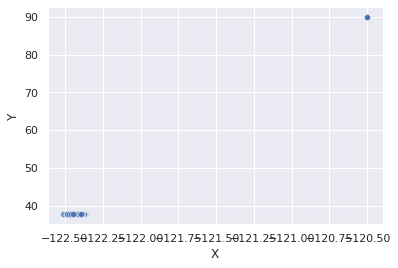

In [237]:
sns.scatterplot(x = 'X', y = 'Y', data = df_train)

In [238]:
df_train.describe()

,X,Y
count,878049.000000,878049.000000
mean,-122.422616,37.771020
std,0.030354,0.456893
min,-122.513642,37.707879
25%,-122.432952,37.752427
50%,-122.416420,37.775421
75%,-122.406959,37.784369
max,-120.500000,90.000000


Looks like there is an outlier on Y coordinate

This outlier can be handled using Standardization mechanism.

In [239]:
df_train.drop(columns= ['Resolution'], inplace=True)

In [240]:
df_train['Dates'] = pd.to_datetime(df_train['Dates'])
df_test['Dates'] = pd.to_datetime(df_test['Dates'])

In [241]:
df_train['year'] =  df_train['Dates'].apply(lambda x: x.year)


In [242]:
df_test['year'] =  df_test['Dates'].apply(lambda x: x.year)

In [243]:
df_train['month'] =  df_train['Dates'].apply(lambda x: x.month)
df_test['month'] =  df_test['Dates'].apply(lambda x: x.month)

df_train['day'] =  df_train['Dates'].apply(lambda x: x.day)
df_test['day'] =  df_test['Dates'].apply(lambda x: x.day)

df_train['hour'] =  df_train['Dates'].apply(lambda x: x.hour)
df_test['hour'] =  df_test['Dates'].apply(lambda x: x.hour)

In [244]:
df_train.drop(columns= ['Dates'], inplace=True)
df_test.drop(columns= ['Dates'], inplace=True)

In [245]:
y_train = df_train.pop('Category')

In [246]:
y_train = pd.DataFrame(y_train, columns=['Category'])

In [247]:
X_train = df_train.copy(deep=True)
X_test = df_test.copy(deep=True)

In [248]:
X_train.drop(columns= ['Descript'], inplace=True)

In [249]:
X_train.columns

Index(['DayOfWeek', 'PdDistrict', 'Address', 'X', 'Y', 'year', 'month', 'day',
       'hour'],
      dtype='object')

In [250]:
X_test.columns

Index(['Id', 'DayOfWeek', 'PdDistrict', 'Address', 'X', 'Y', 'year', 'month',
       'day', 'hour'],
      dtype='object')

In [251]:
X_train.head()

,DayOfWeek,PdDistrict,Address,X,Y,year,month,day,hour
0,Wednesday,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,23
1,Wednesday,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,23
2,Wednesday,NORTHERN,VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,5,13,23
3,Wednesday,NORTHERN,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,5,13,23
4,Wednesday,PARK,100 Block of BRODERICK ST,-122.438738,37.771541,2015,5,13,23


In [252]:
X_test.head()

,Id,DayOfWeek,PdDistrict,Address,X,Y,year,month,day,hour
0,0,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051,2015,5,10,23
1,1,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432,2015,5,10,23
2,2,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212,2015,5,10,23
3,3,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412,2015,5,10,23
4,4,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412,2015,5,10,23


In [253]:
y_Id = X_test.pop('Id')

In [254]:
y_Id

0              0
1              1
2              2
3              3
4              4
           ...  
884257    884257
884258    884258
884259    884259
884260    884260
884261    884261
Name: Id, Length: 884262, dtype: int64

In [255]:
X_test.head()

,DayOfWeek,PdDistrict,Address,X,Y,year,month,day,hour
0,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051,2015,5,10,23
1,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432,2015,5,10,23
2,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212,2015,5,10,23
3,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412,2015,5,10,23
4,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412,2015,5,10,23


In [256]:
X_train.head()

,DayOfWeek,PdDistrict,Address,X,Y,year,month,day,hour
0,Wednesday,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,23
1,Wednesday,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,23
2,Wednesday,NORTHERN,VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,5,13,23
3,Wednesday,NORTHERN,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,5,13,23
4,Wednesday,PARK,100 Block of BRODERICK ST,-122.438738,37.771541,2015,5,13,23


In [257]:
y_train

,Category
0,WARRANTS
1,OTHER OFFENSES
2,OTHER OFFENSES
3,LARCENY/THEFT
4,LARCENY/THEFT
...,...
878044,ROBBERY
878045,LARCENY/THEFT
878046,LARCENY/THEFT
878047,VANDALISM


In [258]:
X_train = X_train.iloc[:,3:9]
X_test = X_test.iloc[:,3:9]

In [259]:
X_test.head()

,X,Y,year,month,day,hour
0,-122.399588,37.735051,2015,5,10,23
1,-122.391523,37.732432,2015,5,10,23
2,-122.426002,37.792212,2015,5,10,23
3,-122.437394,37.721412,2015,5,10,23
4,-122.437394,37.721412,2015,5,10,23


In [260]:
X_train.head()

,X,Y,year,month,day,hour
0,-122.425892,37.774599,2015,5,13,23
1,-122.425892,37.774599,2015,5,13,23
2,-122.424363,37.800414,2015,5,13,23
3,-122.426995,37.800873,2015,5,13,23
4,-122.438738,37.771541,2015,5,13,23


In [261]:
X_train.describe()


,X,Y,year,month,day,hour
count,878049.000000,878049.000000,878049.000000,878049.000000,878049.000000,878049.000000
mean,-122.422616,37.771020,2008.712046,6.436509,15.570623,13.412655
std,0.030354,0.456893,3.631194,3.428972,8.783005,6.549573
min,-122.513642,37.707879,2003.000000,1.000000,1.000000,0.000000
25%,-122.432952,37.752427,2006.000000,3.000000,8.000000,9.000000
50%,-122.416420,37.775421,2009.000000,6.000000,16.000000,14.000000
75%,-122.406959,37.784369,2012.000000,9.000000,23.000000,19.000000
max,-120.500000,90.000000,2015.000000,12.000000,31.000000,23.000000


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


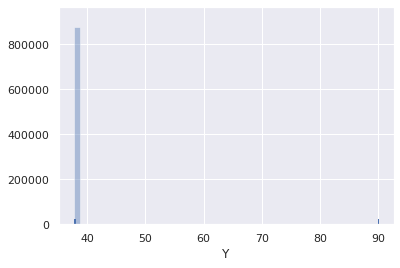

In [262]:
sns.distplot(X_train['Y'], kde=False, rug=True)

In [263]:
meanY = X_train.Y.mean()

ind_train = X_train.query('Y > 70').index
ind_test = X_test.query('Y > 70').index

In [264]:
def changeVal(x):
  if x>70:
    return meanY
  else:
    return x

In [265]:
tempdf = X_train['Y'].copy(deep=True)
tempdf = tempdf.apply(changeVal)

In [266]:
X_train['Y'] = tempdf

In [267]:
tempdf = X_test['Y'].copy(deep=True)
tempdf = tempdf.apply(changeVal)

X_test['Y'] = tempdf

In [268]:
X_test.describe()

,X,Y,year,month,day,hour
count,884262.000000,884262.000000,884262.000000,884262.000000,884262.000000,884262.000000
mean,-122.422693,37.766987,2008.703743,6.314065,15.650294,13.396023
std,0.030985,0.024178,3.637850,3.467064,8.874769,6.558899
min,-122.513642,37.707879,2003.000000,1.000000,1.000000,0.000000
25%,-122.433069,37.752374,2005.000000,3.000000,8.000000,9.000000
50%,-122.416517,37.775421,2009.000000,6.000000,16.000000,14.000000
75%,-122.406959,37.784353,2012.000000,9.000000,23.000000,19.000000
max,-120.500000,37.820621,2015.000000,12.000000,31.000000,23.000000


In [269]:
X_train.describe()

,X,Y,year,month,day,hour
count,878049.000000,878049.000000,878049.000000,878049.000000,878049.000000,878049.000000
mean,-122.422616,37.767035,2008.712046,6.436509,15.570623,13.412655
std,0.030354,0.024164,3.631194,3.428972,8.783005,6.549573
min,-122.513642,37.707879,2003.000000,1.000000,1.000000,0.000000
25%,-122.432952,37.752427,2006.000000,3.000000,8.000000,9.000000
50%,-122.416420,37.775421,2009.000000,6.000000,16.000000,14.000000
75%,-122.406959,37.784368,2012.000000,9.000000,23.000000,19.000000
max,-120.500000,37.819975,2015.000000,12.000000,31.000000,23.000000


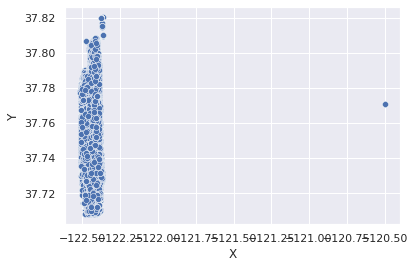

In [270]:
sns.scatterplot(x = 'X', y = 'Y', data = X_test)

In [271]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

cols = X_train.columns

X_train[cols] = scaler.fit_transform(X_train[cols])

X_test[cols] = scaler.fit_transform(X_test[cols])


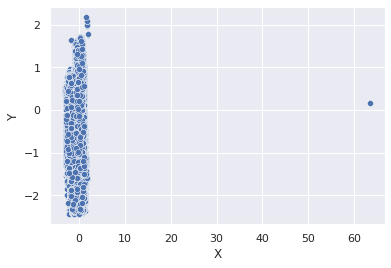

In [272]:
sns.scatterplot(x = 'X', y = 'Y', data = X_train)

In [273]:
X_train.describe()

,X,Y,year,month,day,hour
count,8.780490e+05,8.780490e+05,8.780490e+05,8.780490e+05,8.780490e+05,8.780490e+05
mean,5.777453e-13,1.987629e-13,-1.228077e-12,-7.770870e-14,2.962428e-15,-1.291517e-15
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-2.998840e+00,-2.448130e+00,-1.573050e+00,-1.585464e+00,-1.658957e+00,-2.047868e+00
25%,-3.404912e-01,-6.045246e-01,-7.468748e-01,-1.002198e+00,-8.619632e-01,-6.737321e-01
50%,2.041550e-01,3.470397e-01,7.930022e-02,-1.273002e-01,4.888728e-02,8.967695e-02
75%,5.158463e-01,7.173053e-01,9.054753e-01,7.475980e-01,8.458815e-01,8.530860e-01
max,6.334063e+01,2.190911e+00,1.731650e+00,1.622496e+00,1.756732e+00,1.463813e+00


In [274]:
X_train[X_train.X > 6]

,X,Y,year,month,day,hour
660485,63.340628,0.164932,-1.022266,1.622496,1.642876,0.547722
660711,63.340628,0.164932,-1.022266,1.622496,1.642876,-2.047868
660712,63.340628,0.164932,-1.022266,1.622496,1.642876,-2.047868
661106,63.340628,0.164932,-1.022266,1.622496,1.529019,-2.047868
666430,63.340628,0.164932,-1.022266,1.330864,1.642876,-0.368368
...,...,...,...,...,...,...
844995,63.340628,0.164932,-1.573050,-0.127300,-0.520394,-0.826414
845842,63.340628,0.164932,-1.573050,-0.127300,-0.748107,-0.673732
852880,63.340628,0.164932,-1.573050,-0.418933,-1.545101,-1.895186
857248,63.340628,0.164932,-1.573050,-0.710566,-0.178825,0.395041


In [275]:
meanX = X_train.X.mean()


def changeVal2(x):
  if x>6:
    return meanX
  else:
    return x

In [276]:
tempdf = X_train['X'].copy(deep=True)
tempdf = tempdf.apply(changeVal2)

X_train['X'] = tempdf

In [277]:
tempdf = X_test['X'].copy(deep=True)
tempdf = tempdf.apply(changeVal2)

X_test['X'] = tempdf

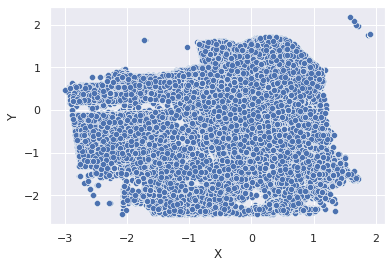

In [278]:
sns.scatterplot(x = 'X', y = 'Y', data = X_train)

In [279]:
X_train.head()

,X,Y,year,month,day,hour
0,-0.107902,0.313017,1.73165,-0.418933,-0.292682,1.463813
1,-0.107902,0.313017,1.73165,-0.418933,-0.292682,1.463813
2,-0.057541,1.381384,1.73165,-0.418933,-0.292682,1.463813
3,-0.144262,1.400351,1.73165,-0.418933,-0.292682,1.463813
4,-0.531112,0.186488,1.73165,-0.418933,-0.292682,1.463813


In [280]:
X_test.head()

,X,Y,year,month,day,hour
0,0.745700,-1.320842,1.730764,-0.379014,-0.63667,1.464267
1,1.005982,-1.429147,1.730764,-0.379014,-0.63667,1.464267
2,-0.106786,1.043315,1.730764,-0.379014,-0.63667,1.464267
3,-0.474449,-1.884940,1.730764,-0.379014,-0.63667,1.464267
4,-0.474449,-1.884940,1.730764,-0.379014,-0.63667,1.464267


In [281]:
y_train.describe()

,Category
count,878049
unique,39
top,LARCENY/THEFT
freq,174900


In [285]:
from sklearn.preprocessing import OneHotEncoder

mlb = OneHotEncoder()

y_train_1 = mlb.fit_transform(y_train)

In [310]:
y_train = pd.DataFrame(pd.DataFrame.sparse.from_spmatrix(y_train_1))

In [311]:
y_train.columns = mlb.categories_[0]

In [312]:
y_train.head()

,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,EMBEZZLEMENT,EXTORTION,FAMILY OFFENSES,FORGERY/COUNTERFEITING,FRAUD,GAMBLING,KIDNAPPING,LARCENY/THEFT,LIQUOR LAWS,LOITERING,MISSING PERSON,NON-CRIMINAL,OTHER OFFENSES,PORNOGRAPHY/OBSCENE MAT,PROSTITUTION,RECOVERED VEHICLE,ROBBERY,RUNAWAY,SECONDARY CODES,SEX OFFENSES FORCIBLE,SEX OFFENSES NON FORCIBLE,STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [313]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_train, y_train, test_size=0.30, random_state=100)


In [326]:
y_train.columns

Index(['ARSON', 'ASSAULT', 'BAD CHECKS', 'BRIBERY', 'BURGLARY',
       'DISORDERLY CONDUCT', 'DRIVING UNDER THE INFLUENCE', 'DRUG/NARCOTIC',
       'DRUNKENNESS', 'EMBEZZLEMENT', 'EXTORTION', 'FAMILY OFFENSES',
       'FORGERY/COUNTERFEITING', 'FRAUD', 'GAMBLING', 'KIDNAPPING',
       'LARCENY/THEFT', 'LIQUOR LAWS', 'LOITERING', 'MISSING PERSON',
       'NON-CRIMINAL', 'OTHER OFFENSES', 'PORNOGRAPHY/OBSCENE MAT',
       'PROSTITUTION', 'RECOVERED VEHICLE', 'ROBBERY', 'RUNAWAY',
       'SECONDARY CODES', 'SEX OFFENSES FORCIBLE', 'SEX OFFENSES NON FORCIBLE',
       'STOLEN PROPERTY', 'SUICIDE', 'SUSPICIOUS OCC', 'TREA', 'TRESPASS',
       'VANDALISM', 'VEHICLE THEFT', 'WARRANTS', 'WEAPON LAWS'],
      dtype='object')

In [328]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

model = OneVsRestClassifier(DecisionTreeClassifier())

model.fit(X_train, y_train)

print('Training Score: ', model.score(X_train, y_train))

Training Score:  0.7485094795392968


In [329]:
y_test_predict = model.predict(X_test)
y_train_predict = model.predict(X_train)


In [330]:
y_test_predict = pd.DataFrame(y_test_predict,columns=mlb.categories_[0])

In [331]:
df = pd.concat([pd.DataFrame(y_Id, columns=['Id']), y_test_predict], axis=1, ignore_index=True)


In [333]:
df.columns = ['Id', 'ARSON', 'ASSAULT', 'BAD CHECKS', 'BRIBERY', 'BURGLARY',
       'DISORDERLY CONDUCT', 'DRIVING UNDER THE INFLUENCE', 'DRUG/NARCOTIC',
       'DRUNKENNESS', 'EMBEZZLEMENT', 'EXTORTION', 'FAMILY OFFENSES',
       'FORGERY/COUNTERFEITING', 'FRAUD', 'GAMBLING', 'KIDNAPPING',
       'LARCENY/THEFT', 'LIQUOR LAWS', 'LOITERING', 'MISSING PERSON',
       'NON-CRIMINAL', 'OTHER OFFENSES', 'PORNOGRAPHY/OBSCENE MAT',
       'PROSTITUTION', 'RECOVERED VEHICLE', 'ROBBERY', 'RUNAWAY',
       'SECONDARY CODES', 'SEX OFFENSES FORCIBLE', 'SEX OFFENSES NON FORCIBLE',
       'STOLEN PROPERTY', 'SUICIDE', 'SUSPICIOUS OCC', 'TREA', 'TRESPASS',
       'VANDALISM', 'VEHICLE THEFT', 'WARRANTS', 'WEAPON LAWS']

In [334]:
df.head()

,Id,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,EMBEZZLEMENT,EXTORTION,FAMILY OFFENSES,FORGERY/COUNTERFEITING,FRAUD,GAMBLING,KIDNAPPING,LARCENY/THEFT,LIQUOR LAWS,LOITERING,MISSING PERSON,NON-CRIMINAL,OTHER OFFENSES,PORNOGRAPHY/OBSCENE MAT,PROSTITUTION,RECOVERED VEHICLE,ROBBERY,RUNAWAY,SECONDARY CODES,SEX OFFENSES FORCIBLE,SEX OFFENSES NON FORCIBLE,STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [335]:
df.to_csv('Submission.csv', index=False)

In [336]:
!kaggle competitions submit -c sf-crime -f /content/Submission.csv -m "Submission 1"

100% 71.6M/71.6M [00:02<00:00, 37.1MB/s]
Successfully submitted to San Francisco Crime Classification